# Electromotive Response to Non-Ideal Magnetic Dipole

An experiment was performed to record the electromotive response of a bar magnet as it free-falls through a set of 4 coils. This experiment was done for 2 bar magnets - a long one and a short one. The short magnet's data matched closely to the theoretical emf from the dipole approximation. The long magnet, however, did not match the expected dipole approximation. 

Below code attempts to analyse data gathered for long magnet from aforementioned experiment, and numerically calculate the emf measured at coil 3, instead of just applying the dipole approximation. Refer graphs below.

In [1]:
import numpy as np

Data for Long magnet

In [2]:
data_emf = []

# Copied data from Graphical Analysis to text file (and not this notebook directly)
# since too many data points to individidually put commas after

g = open('Long magnet data through loop 3.txt','r')

for line in g:
    for word in line.split(' \n'): 
    # i.e. make python understand that the space at the end and the "enter symbol" should be ignored

        data_emf.append(float(word))

g.close()

data_emf = np.array(data_emf)/300  # divide raw data by amplifier gain

In [3]:
times = []
start_time = 0.6050   # this is the time (in the Graphical Analysis file) when the relevant data begins

for i in range(len(data_emf)):
    s_time = start_time + i*0.0005    # that is the minimum time step of the a/d unit
    times.append(s_time)

times = np.array(times)

Data of set up

In [4]:
R = 0.01*4.42 # m; Radius of coil

a = 0.01*2*462.4 # m/s^2; Acceleration of long magnet from graph

# time when *center* of long magnet passes through center of loop (when emf reading goes from +ve to -ve)
t0 = (times[186]+times[187])/2  

r = 0.001*7.65/2 # m; radius of long magnet

l = 0.001*86.35 # m; length of long magnet

dipole_moment = 5.1  # A.m^2; Dipole moment of long magnet found through direct measurement

N = 20  # No. of turns of coil

mu_0 = 4*np.pi*10**(-7)

In [5]:
t0

0.69825000000000004

Expected magnetization

In [6]:
M = dipole_moment/(np.pi*l*r**2)  # Magnetization

In [7]:
print(M)

1284976.19606598


Code begins here

In [8]:
'''
These are the integrands to find the magnetic vector potential
of a long magnet of length l, radius r
'''

x_helix = lambda s: r*np.cos(s)
y_helix = lambda s: r*np.sin(s)

fx = lambda s, z_helix, x0, y0, z0: (-1*r*np.sin(s))/np.sqrt((x0 - x_helix(s))**2 + (y0 - y_helix(s))**2 + (z0 - z_helix)**2)
fy = lambda s, z_helix, x0, y0, z0: (r*np.cos(s))/np.sqrt((x0 - x_helix(s))**2 + (y0 - y_helix(s))**2 + (z0 - z_helix)**2)
fz = lambda s, z_helix, x0, y0, z0: 0

In [9]:
n = 80 #resolution of integration

phi = np.linspace(0, 2*np.pi, n)


z_helix = np.linspace(0, l, n)
# It would have been more convenient to have z go from -l/2 to l/2
# but the integration required positive limits.
# Hence when calculation will be done w.r.t. coil, z0 -> z0 + l/2
# to account for the offset.

In [10]:
d_phi = 2*np.pi/n
d_z_helix = l/n

In [11]:
def A(x0, y0, z0):
    '''
    Returns magnetic vector potential at (x0, y0, z0) through numerical integration
    '''
    Ax = 0
    Ay = 0
    Az = 0
    
    for i in range(len(phi)):
        for j in range(len(z_helix)):
            Ax = Ax + fx(phi[i], z_helix[j], x0, y0, z0)*d_phi*d_z_helix
            Ay = Ay + fy(phi[i], z_helix[j], x0, y0, z0)*d_phi*d_z_helix

    return Ax, Ay, Az

Assuming center of loop is the origin (0,0,0)

In [49]:
v = 3.6971 # m/s; velocity of magnet at (0, 0, 0); refer report

In [50]:
def zc(t):
    '''
    Returns position of magnet as a function of time
    zc < 0 before magnet passes through loop and
    zc > 0 after magnet passes through loop
    '''
    return v*(t - t0) + 0.5*a*(t - t0)**2

In [52]:
new_times = times[0::7]  # to reduce computation time

print(len(times), times[0])
print(len(new_times), new_times[0])

329 0.605
47 0.605


In [53]:
theta = np.linspace(0, 2*np.pi, n+1)
d_theta = 2*np.pi/n

def flux(z0):
    '''
    Takes line integral of Vector potential around loop, 
    when magnet is at point (0, 0, z0).
    This returns flux.
    '''
    flux = 0
    
    for i in range(len(theta)):
        A_comp = A(R*np.cos(theta[i]), R*np.sin(theta[i]), z0 + l/2) # z0 ->z0 + l/2 due to offset
        
        flux = flux + (-1*A_comp[0]*np.sin(theta[i]) + A_comp[1]*np.cos(theta[i]))*R*d_theta

    return flux

In [54]:
def emf():
    '''
    Differentiates flux at different times
    '''
    emf = [0.0]
    for i in range(1, len(new_times)):
        t2 = new_times[i]
        t1 = new_times[i-1]
        
        emf.append((flux(zc(t2)) - flux(zc(t1)))/(t2 - t1))
        
        #print(emf[i])
    
    return emf        

In [55]:
calc_emf = emf()

In [56]:
calc_emf = -1*N*np.array(calc_emf) # Lenz law

In [57]:
print(calc_emf)

[-0.         -0.00111943 -0.00129406 -0.00150558 -0.00176395 -0.00208241
 -0.00247886 -0.00297771 -0.00361287 -0.00443214 -0.0055041  -0.00692902
 -0.00885656 -0.01151518 -0.01526193 -0.02066899 -0.02867593 -0.04085901
 -0.0598935  -0.09025767 -0.13886408 -0.2135981  -0.31322843 -0.40331502
 -0.41489052 -0.32149646 -0.17483489 -0.02169549  0.13428756  0.29631002
  0.42352238  0.44032094  0.34932314  0.23435473  0.14726814  0.09214742
  0.05895426  0.03889146  0.02647278  0.0185531   0.01334817  0.00982942
  0.00738862  0.00565594  0.00440017  0.00347299  0.0027769 ]


Normalizing emf and finding dipole moment...

In [64]:
factor = M/1.6
normalized_emf = (mu_0*M/(4*np.pi*factor))*(-1)*calc_emf

Starting plot...

In [26]:
import matplotlib.pyplot as plt
%matplotlib nbagg

In [23]:
def dipole_emf(m_approx):
    '''
    Returns emf using dipole approximation formula
    with dipole moment as free parameter
    '''
    E = []
    for i in range(len(times)):
        v = np.sqrt(np.abs(2*a*(zc(times[i]) - 0.1778)))
        E.append(-1.5*N*mu_0*m_approx*(R**2)*zc(times[i])*v/(R**2 + zc(times[i])**2)**(2.5))
    
    return np.array(E)

<IPython.core.display.Javascript object>


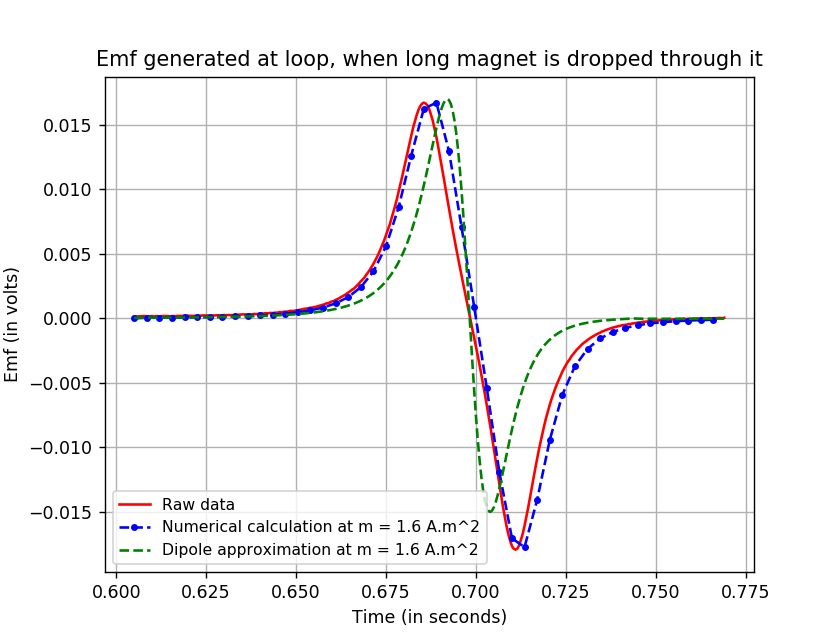

Dipole moment of long magnet was measured, using gaussmeter, to be about 5.1 A.m^2
Both dipole approximation, and numerical calculation, find its dipole moment to be 1.6 A.m^2
This implies that the measurement using the gaussmeter was wrong
Hence magnetization of long magnet was found to be 803110.1 A/m


In [73]:
plt.close()

plt.plot(times, data_emf, 'r-', label='Raw data')
plt.plot(new_times, normalized_emf, 'b.--', label='Numerical calculation at m = 1.6 A.m^2')
plt.plot(times, dipole_emf(1.6), 'g--', label='Dipole approximation at m = 1.6 A.m^2')
plt.title("Emf generated at loop, when long magnet is dropped through it")
plt.grid(True)
plt.xlabel("Time (in seconds)")
plt.ylabel("Emf (in volts)")
plt.legend(fontsize= 9)
plt.show()

print("Dipole moment of long magnet was measured, using gaussmeter, to be about 5.1 A.m^2")
print("Both dipole approximation, and numerical calculation, find its dipole moment to be 1.6 A.m^2")
print("This implies that the measurement using the gaussmeter was wrong")
print("Hence magnetization of long magnet was found to be " + str(round(M/1.6 , 1)) + " A/m")